# Z_score Method

#Assumption : Feature should follow normal distribution or close to normal distribution

#Steps:
- Check the data is normally distributed or not
- Find out the (mean + 3*sd) and (mean - 3*sd)
- perform capping or trimming

### What is standard deviation

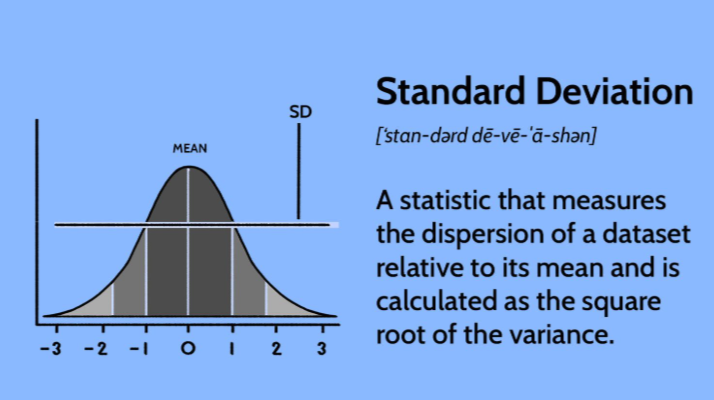

### Normal Distribution
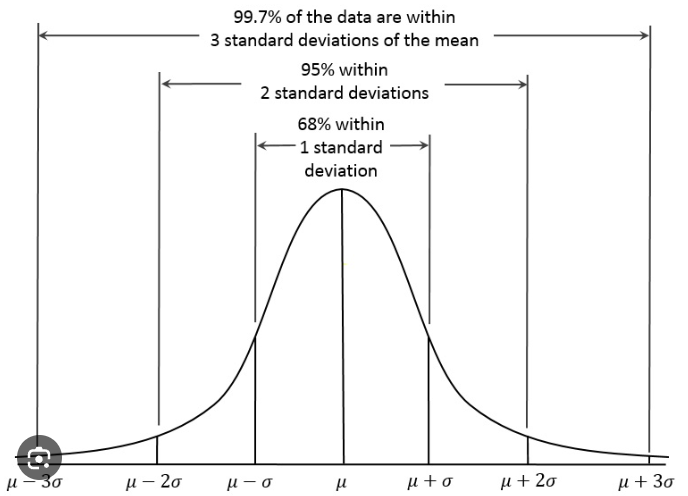 

### What is standard deviation

z' = (z - mean)/S.D.

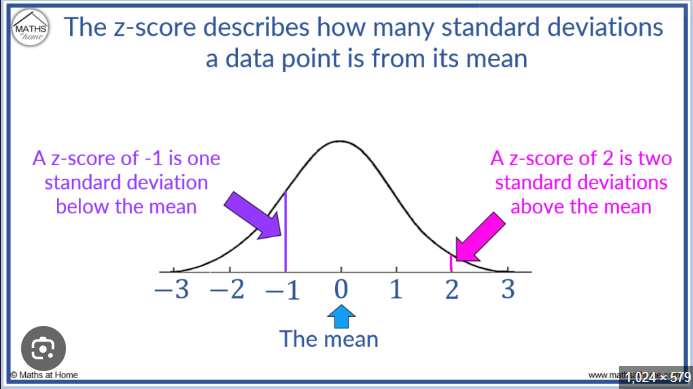

In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df = pd.read_csv('E:\ml_revision\outliers\Datasets\placement.csv')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Aditya\AppData\Local\Temp\ipykernel_3316\1508412341.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('E:\ml_revision\outliers\Datasets\placement.csv')


In [8]:
df.shape

(1000, 3)

In [6]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [9]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


C:\Users\Aditya\AppData\Local\Temp\ipykernel_3316\1594084704.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],color= 'red')
C:\Users\Aditya\AppData\Local\Temp\ipykernel_3316\1594084704.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'],color='red')


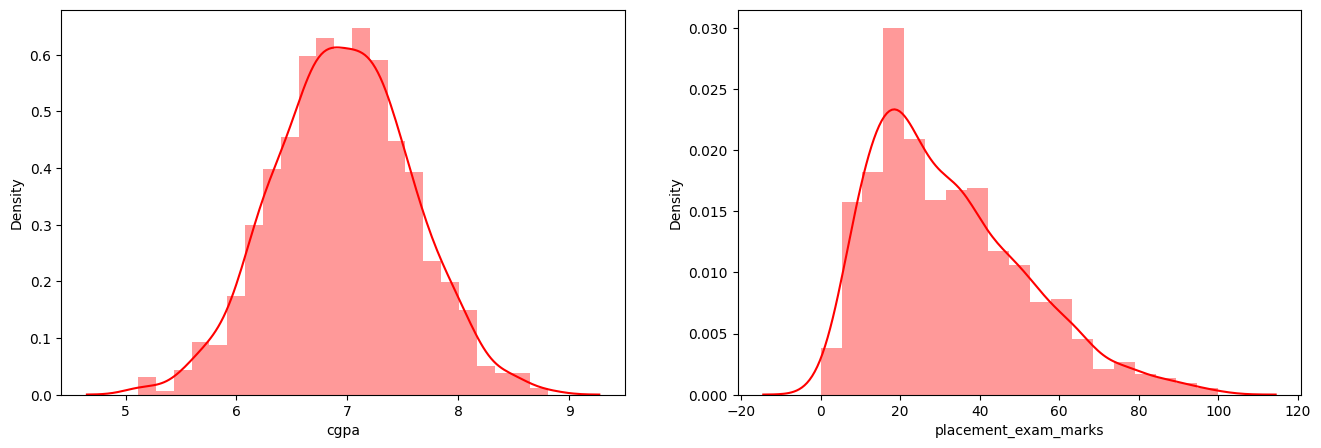

In [40]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'],color= 'red')

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'],color='red')

plt.show()

## Capping

In [28]:
# lets find the outliter range for cpg as it follow normal distribution

print("Upperlimit -> " , df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowerlimit -> " , df['cgpa'].mean() - 3*df['cgpa'].std())

Upperlimit ->  8.808933625397168
Lowerlimit ->  5.113546374602832


In [34]:
print(df[(df['cgpa'] <= 5.11) | (df['cgpa'] >= 9.11)])

     cgpa  placement_exam_marks  placed
485  4.92                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
999  4.90                  10.0       1


In [36]:
df['cgpa'] = np.where(
    df['cgpa'] >= df['cgpa'].mean() + 3*df['cgpa'].std(),
    df['cgpa'].mean() + 3*df['cgpa'].std(),
    np.where(
        df['cgpa'] <= df['cgpa'].mean() - 3*df['cgpa'].std(),
        df['cgpa'].mean() - 3*df['cgpa'].std(),
        df['cgpa']
        )
    )


In [37]:
print(df[(df['cgpa'] <= 5.11) | (df['cgpa'] >= 9.11)])

Empty DataFrame
Columns: [cgpa, placement_exam_marks, placed]
Index: []


## Trimming

In [41]:
# Trimming
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.190000,26.0,1
1,7.460000,38.0,1
2,7.540000,40.0,1
3,6.420000,8.0,1
4,7.230000,17.0,0
...,...,...,...
993,6.730000,21.0,1
994,6.480000,63.0,0
997,5.113546,34.0,0
998,8.620000,46.0,1
